# Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Data Insights

In [3]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

# Creating x and y variables

In [6]:
x=data.iloc[:,0:5]
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [7]:
y=data[["diagnosis"]]
y

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [8]:
y.shape

(569, 1)

In [9]:
cor=x.corr()

<Axes: >

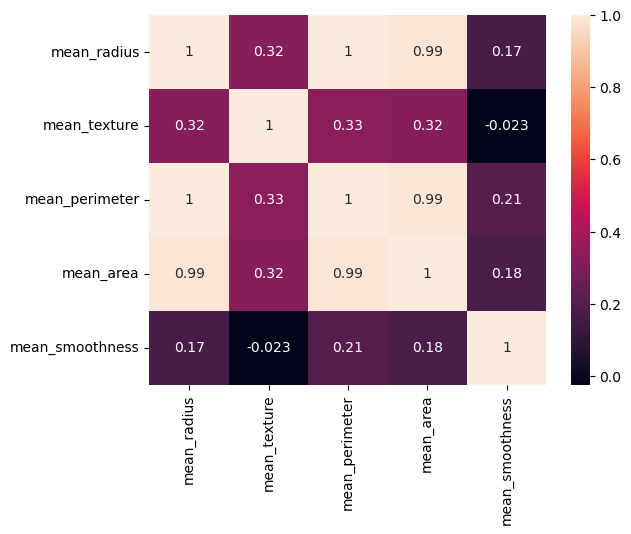

In [10]:
sns.heatmap(cor,annot=True)

# Detecting the outliers

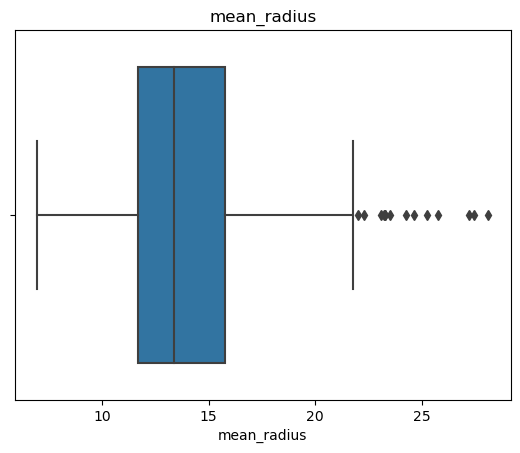

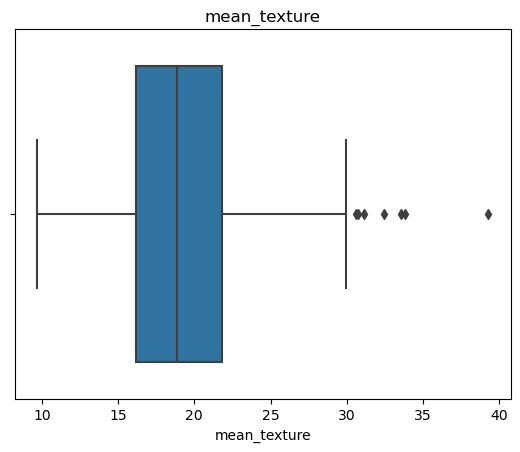

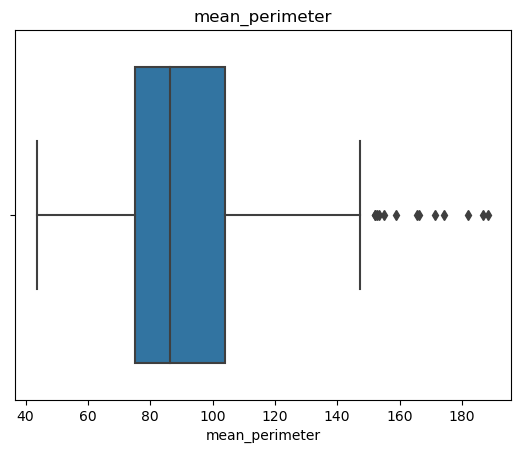

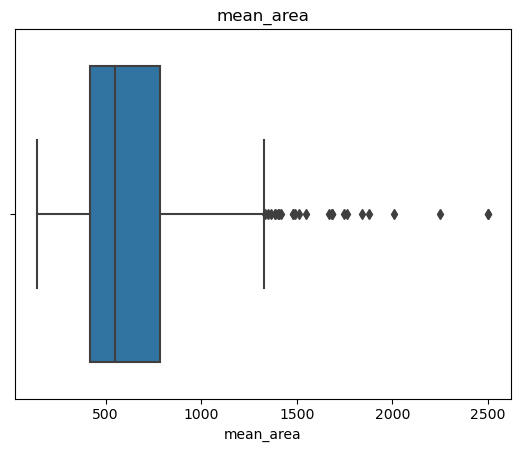

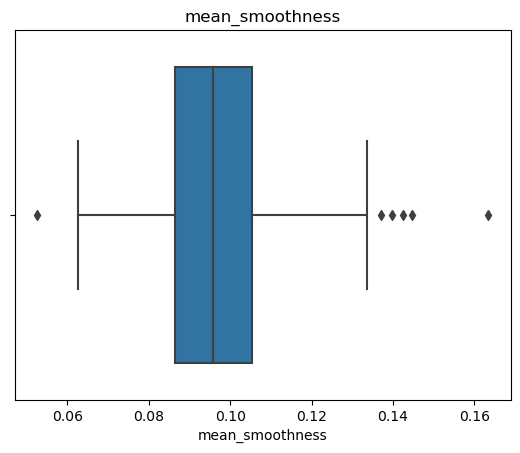

In [11]:
for i in x.columns:
    sns.boxplot(data=x,x=i)
    plt.title(f'{i}')
    plt.show()

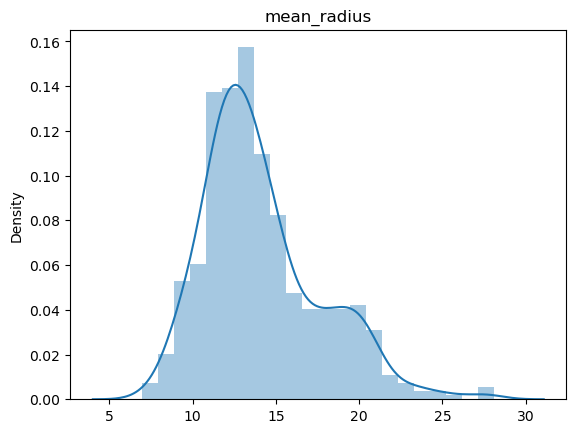

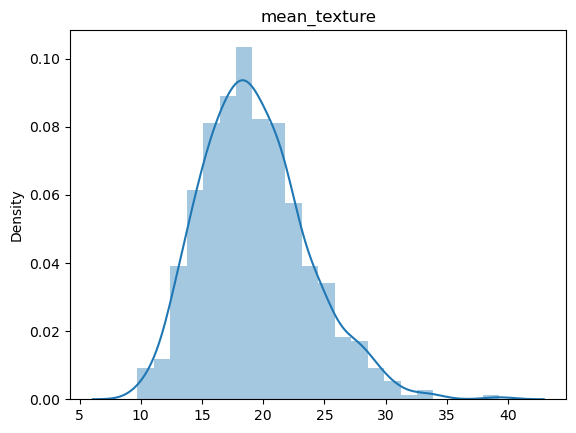

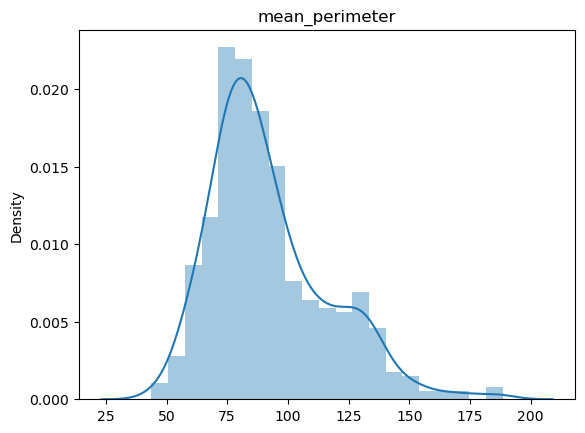

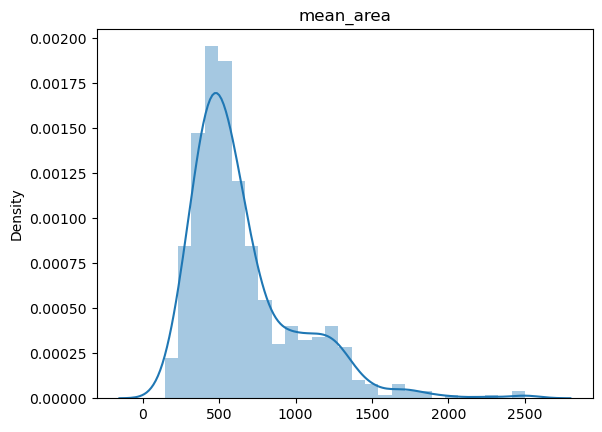

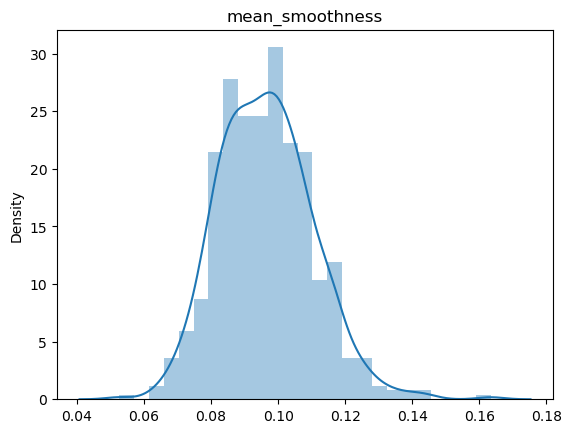

In [12]:
import warnings
warnings.filterwarnings('ignore')
for i in x.columns:
    sns.distplot(x[[f'{i}']])
    plt.title(f'{i}')
    plt.show()

#  Removing the outliers by Interquartile Range

In [13]:
def iqr(i):
    u=x[i].quantile(0.75)
    l=x[i].quantile(0.25)
    iqr=u-l
    u_limit=u+1.5*iqr
    l_limit=l-1.5*iqr
    x[i]=np.where(x[i]>u_limit,u_limit,
                  np.where(x[i]<l_limit,l_limit,x[i])   
    )

for i in x.columns:
    iqr(i)

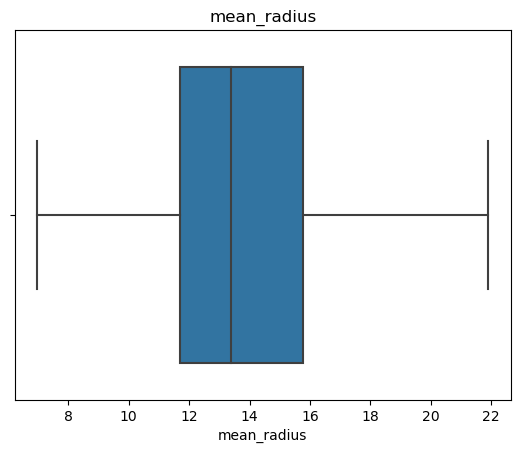

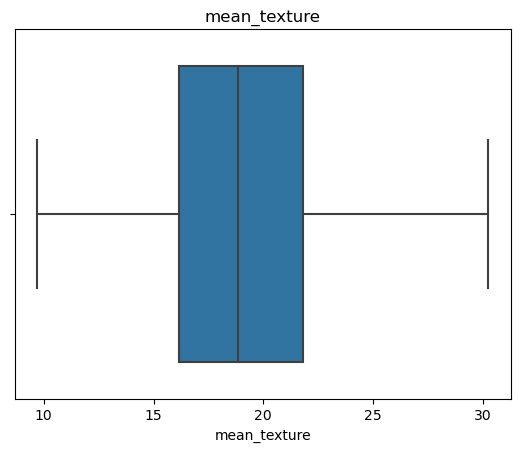

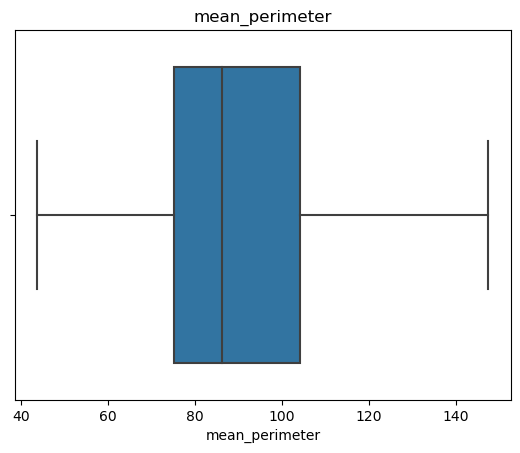

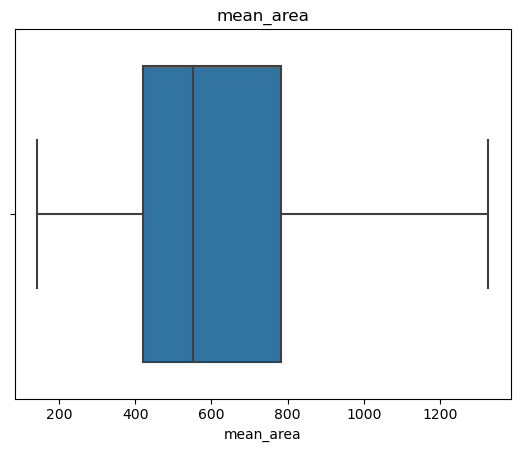

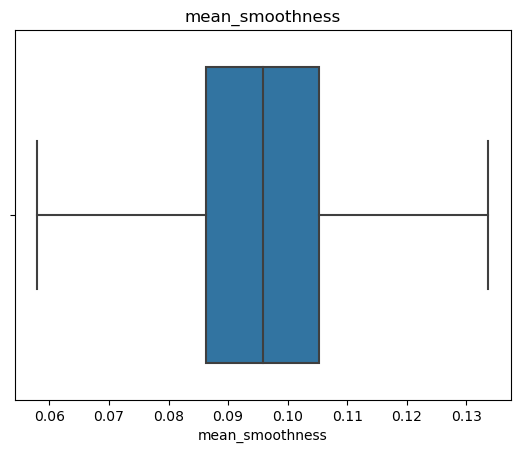

In [20]:
for i in x.columns:
    sns.boxplot(data = x, x = i)
    plt.title(f'{i}')
    plt.show()

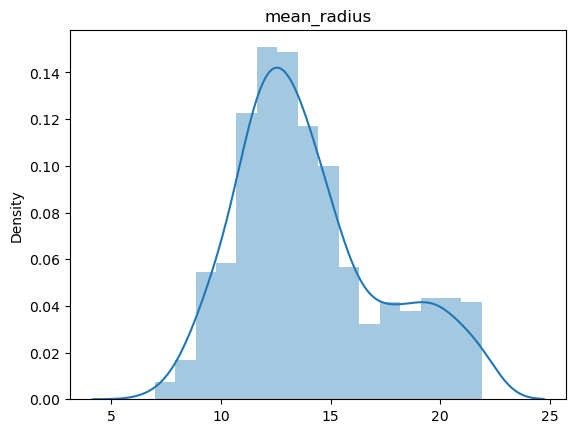

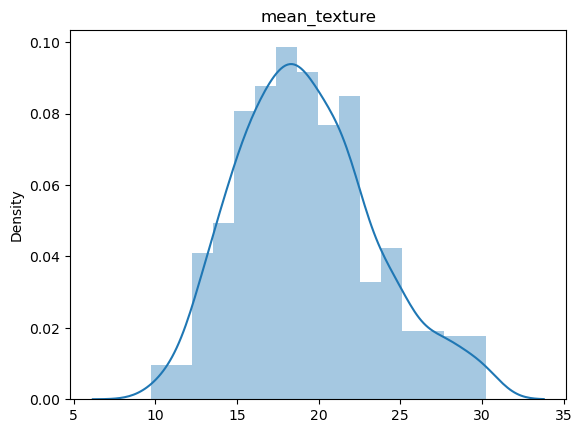

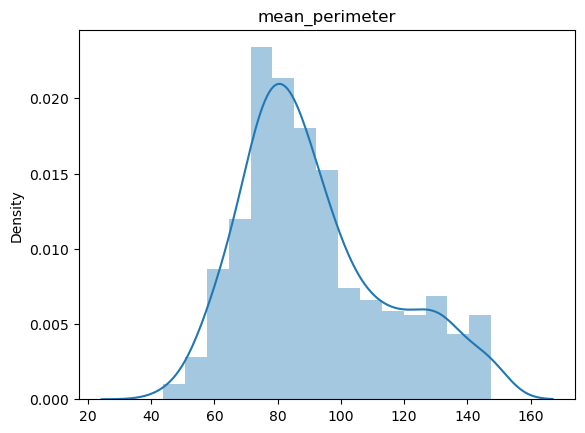

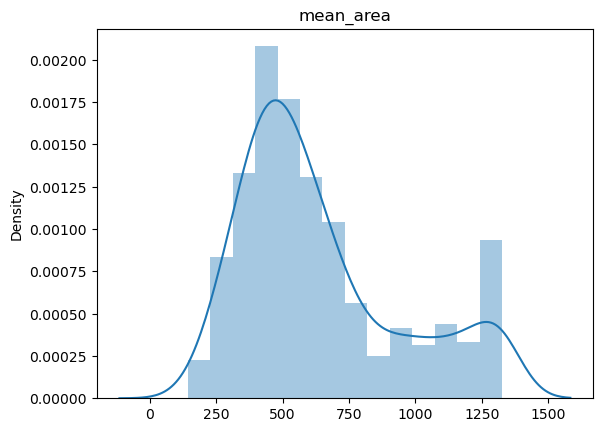

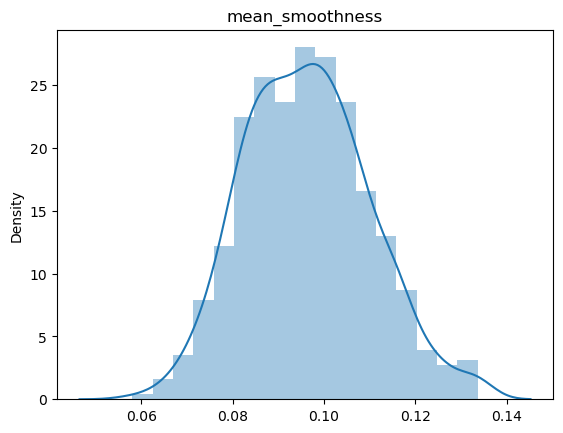

In [21]:
for i in x.columns:
    sns.distplot(x[[f'{i}']])
    plt.title(f'{i}')
    plt.show()

#  Scaling

In [23]:
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.118400
1,20.57,17.77,132.90,1326.0,0.084740
2,19.69,21.25,130.00,1203.0,0.109600
3,11.42,20.38,77.58,386.1,0.133695
4,20.29,14.34,135.10,1297.0,0.100300
...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000
565,20.13,28.25,131.20,1261.0,0.097800
566,16.60,28.08,108.30,858.1,0.084550
567,20.60,29.33,140.10,1265.0,0.117800


In [31]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_1=mc.fit_transform(x)
x=pd.DataFrame(x_1,columns=x.columns)
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.737918,0.032627,0.761873,0.724975,0.798006
1,0.910852,0.392501,0.859264,0.999746,0.353473
2,0.851867,0.561967,0.831300,0.895756,0.681788
3,0.297540,0.519601,0.325828,0.205107,1.000000
4,0.892084,0.225469,0.880478,0.975228,0.558967
...,...,...,...,...,...
564,0.977210,0.617482,0.947013,1.000000,0.700277
565,0.881359,0.902849,0.842872,0.944792,0.525951
566,0.644748,0.894570,0.622053,0.604160,0.350964
567,0.912863,0.955442,0.928692,0.948174,0.790082


#  Train_Test_Split

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
x_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
280,0.816342,0.822498,0.794658,0.840801,0.581418
186,0.759367,0.431945,0.721373,0.758793,0.368529
437,0.473155,0.305332,0.443469,0.395418,0.351360
329,0.621959,0.592647,0.614339,0.577697,0.772913
201,0.707755,0.467981,0.687624,0.683209,0.418714
...,...,...,...,...,...
480,0.347141,0.405162,0.332674,0.263612,0.434429
422,0.310275,0.307280,0.305385,0.223791,0.671223
119,0.735237,0.501583,0.678945,0.708911,0.343965
256,0.842483,0.928171,0.866014,0.899138,0.457277


In [46]:
x_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
266,0.242577,0.449963,0.245793,0.171542,0.513801
448,0.505999,0.468955,0.486572,0.436422,0.342116
420,0.307594,0.454346,0.293236,0.225059,0.362982
493,0.367250,0.151936,0.337881,0.282212,0.207937
321,0.883370,0.484539,0.841907,0.955783,0.293516
...,...,...,...,...,...
169,0.535492,0.352569,0.505569,0.458573,0.535856
551,0.278102,0.619917,0.267104,0.198597,0.497689
566,0.644748,0.894570,0.622053,0.604160,0.350964
287,0.396072,0.166058,0.367388,0.314846,0.152866


In [47]:
y_train

,diagnosis
280,0
186,0
437,1
329,0
201,0
...,...
480,1
422,1
119,0
256,0


In [48]:
y_test

,diagnosis
266,1
448,1
420,1
493,1
321,0
...,...
169,1
551,1
566,0
287,1
